# Muestreo de señales

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ivan-jgr/computacion-cientifica/blob/main/Laboratorios/Laboratorio-6.ipynb)

Actualmente la mayor parte del procesamiento de señales se realiza de forma digital. Esto significa que las señales se transforman en valores discretos y se manipulan mediante un ordenador.

Cuando la señal original no es un conjunto de valores discretos sino una variación continua a lo largo del tiempo, es necesaria una transformación para obtener la señal en forma digital. Esta transformación se conoce como conversión analógico - digital (A/D), que implica dos etapas: el muestreo y la cuantificación de la señal. El muestreo consiste en tomar valores de la señal cada cierto tiempo, es decir, no considerar todo el tiempo de forma continua sino solamente unas muestras equiespaciadas, con lo que el resultado es un conjunto finito de valores. La cuantificación se refiere a asignar a la amplitud de estos instantes de tiempo escogidos (es decir, al valor que toma la señal en estos instantes) un valor concreto de entre un conjunto finito de posibles valores, que son los que vendrán determinados por el número de bits N considerados en este proceso.

En este laboratorio nos enfocaremos solamente en el muestreo de señales.

Para simplificar el problema, consideremos que la señal a muestrear es una señal sinusoidal de la forma $f(t) = \sin(2 \pi f t)$ donde $f$ es la frecuencia de la señal ( en Hz) y $t$ es la variable temporal. El proceso de muestreo consiste en tomar valores de $f(t)$ en instantes concretos de $t$ esto es en instantes de la forma $t = nT_s$ donde $n$ es un entero que indica el número de muestra:

\begin{equation}
  \left. f[n] = f(t) \right\vert_{t = n T_s}.
\end{equation}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Sampled.signal.svg/1280px-Sampled.signal.svg.png" width=40%/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy import pi

# Configuración de las gráficas
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams['axes.grid'] = True

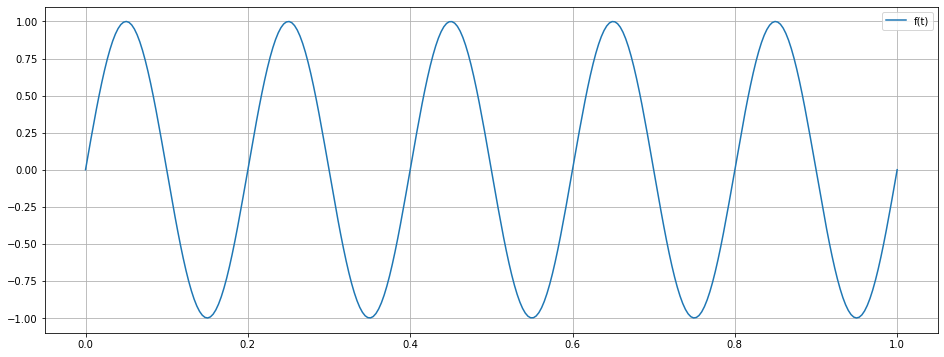

In [6]:
# intervalo de muestreo
t0, t1 = 0, 1
t = np.linspace(t0, t1, 300)


# señal de ejemplo que queremos muestrear
def f(u):
    return np.sin(2*pi*5*u)

plt.plot(t, f(t), label='f(t)')
plt.legend()
plt.show()

In [26]:
# muestreamos a una frecuencia fs
fs = 15 # Hz
T = 1/fs # espaciado entre las muestras

# Note que al punto final le sumamos T para poder incluirlo en las muestras
tn = np.arange(t0, t1 + T, T)

print(f'Se tomaron %d muestras a intervalos regulares de duración %.2f s. cada uno' % (len(tn), T))
print(f'Muestras: {f(tn)}')

Se tomaron 16 muestras a intervalos regulares de duración 0.07 s. cada uno
Muestras: [ 0.00000000e+00 -4.32425679e-01 -9.07591137e-01  4.39201132e+00
 -1.38348220e+00 -8.66025404e-01 -3.30219753e+00  1.49537639e+00
  2.30884968e+00 -1.40008449e+00  8.66025404e-01 -9.67658814e-01
  3.21644081e+00 -2.89663493e+00 -1.91871533e+00  9.79717439e-16]


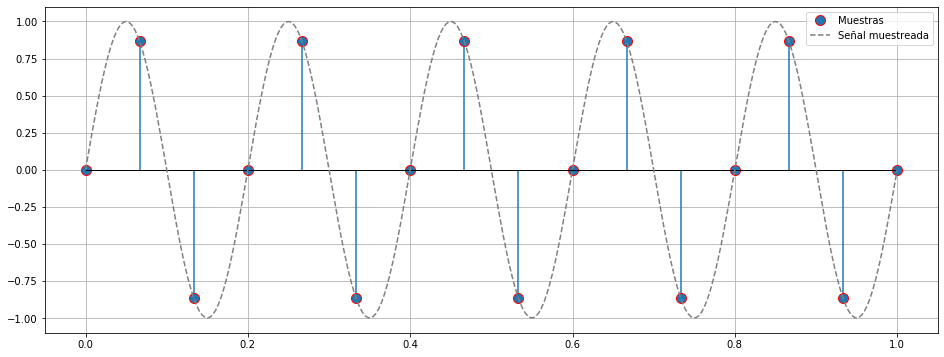

In [23]:
# Graficamos las muestras y la función
markerline, stemlines, baseline = plt.stem(tn, f(tn), use_line_collection=True)
plt.plot(t, f(t), linestyle='--', color='gray', label='Señal muestreada')

plt.setp(baseline, visible=True, color='k',linewidth=1)
plt.setp(markerline, markersize = 10, label='Muestras')
plt.setp(markerline, markeredgecolor = 'r')

plt.legend()
plt.show()

### Frecuencia de Muestreo

La frecuencia con la que debemos tomar las muestras va depende de cómo varía la señal a muestrear: una señal con variaciones lentas precisará de una frecuencia de muestreo menor que una señal de variaciones rápidas.

En términos formales, la frecuencia de muestreo $f_s$ depende de los componentes de frecuencia de la señal que se está muestreando. La mínima frecuencia (teórica) de muestreo $f_s$ necesaria para conseguir recuperar la señal original se conoce como frecuencia de Nyquist ($f_N$).

En clase demostramos que $$f_N = 2 f_{max},$$

donde $f_{max}$ es la frecuencia máxima que contiene la señal a muestrear.

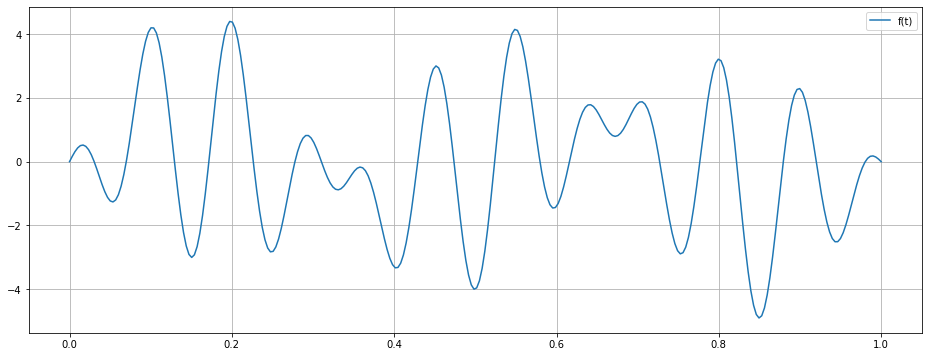

In [24]:
# Definamos una función más compleja para el ejemplo
t0, t1 = 0, 1
t = np.linspace(t0, t1, 300)


# señal de ejemplo que queremos muestrear
def f(u):
    return np.sin(2*pi*2*u)+ 4*np.cos(2*pi*10*u)*np.sin(3*pi*u)

plt.plot(t, f(t), label='f(t)')
plt.legend()
plt.show()

In [64]:
# muestreamos a una frecuencia fs
fs = 5 # Hz
T = 1/fs # espaciado entre las muestras

# Note que al punto final le sumamos T para poder incluirlo en las muestras
tn = np.arange(t0, t1 + T, T)

print(f'Se tomaron %d muestras a intervalos regulares de duración %.2f s. cada uno' % (len(tn), T))
print(f'Muestras: {f(tn)}')

Se tomaron 6 muestras a intervalos regulares de duración 0.20 s. cada uno
Muestras: [ 0.00000000e+00  4.39201132e+00 -3.30219753e+00 -1.40008449e+00
  3.21644081e+00  9.79717439e-16]


La fórmula de interpolación de Whittaker–Shannon nos permite reconstruir una señal a partir de sus muestras.

$$x(t) = \sum_{n = -\infty}^{\infty} x\left[\frac{n}{f_s} \right] \operatorname{sinc} \left(f_s t - n \right)$$

In [65]:
# Aplicamos la formula de interpolación
x_reconstruida = lambda t: sum([f(tk)*np.sinc(fs*(t- tk)) for tk in tn ])

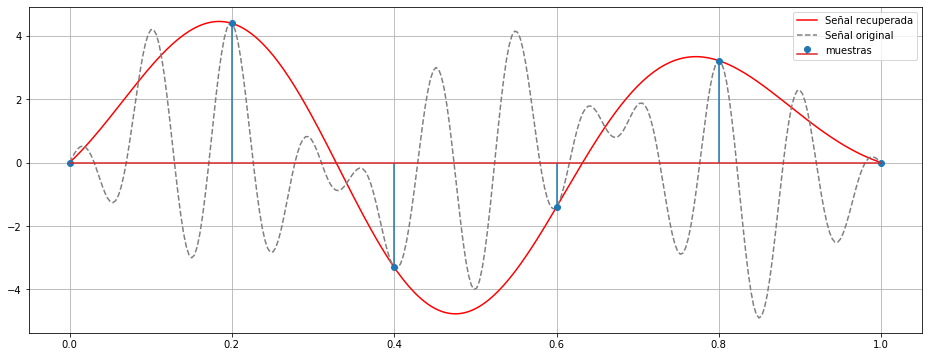

In [66]:
plt.plot(t, x_reconstruida(t), color='r', label='Señal recuperada')
plt.plot(t, f(t), linestyle='--', color='gray', label = 'Señal original')
plt.stem(tn, f(tn), use_line_collection=True, label='muestras')
plt.legend()
plt.show()

Note que la señal recuperada y la señal original no coinciden puesto que la frecuencia de muestreo utilizada $f_s = 15$ Hz es menor a la frecuencia de Nyquist $f_N = 20$ Hz. A este fenómeno se le conoce como **Aliasing**.

In [71]:
# muestreamos a una frecuencia fs mayor a la frecuencia de Nyquist
fs = 35 # Hz
T = 1/fs # espaciado entre las muestras

# Note que al punto final le sumamos T para poder incluirlo en las muestras
tn = np.arange(t0, t1 + T, T)

print(f'Se tomaron %d muestras a intervalos regulares de duración %.2f s. cada uno' % (len(tn), T))
print(f'Muestras: {f(tn)}')

Se tomaron 36 muestras a intervalos regulares de duración 0.03 s. cada uno
Muestras: [ 0.00000000e+00  1.14579755e-01 -1.19048640e+00  2.68321644e+00
  3.18711910e+00 -2.53859088e+00 -5.46142270e-02  4.39201132e+00
 -4.76803234e-01 -2.46076855e+00  6.48204607e-01 -2.77481252e-01
 -5.96478866e-01 -6.86240050e-01 -3.30219753e+00 -8.59359958e-02
  2.80096431e+00 -2.64994518e+00 -2.29283139e+00  3.82676286e+00
  1.47772697e+00 -1.40008449e+00  1.31174608e+00  1.24257668e+00
  1.16810848e+00  1.51597209e+00 -2.28148993e+00 -1.00887693e+00
  3.21644081e+00 -1.72376073e+00 -4.48844670e+00  1.20521957e+00
  9.22025374e-01 -2.50636385e+00 -5.88169893e-01  9.79717439e-16]


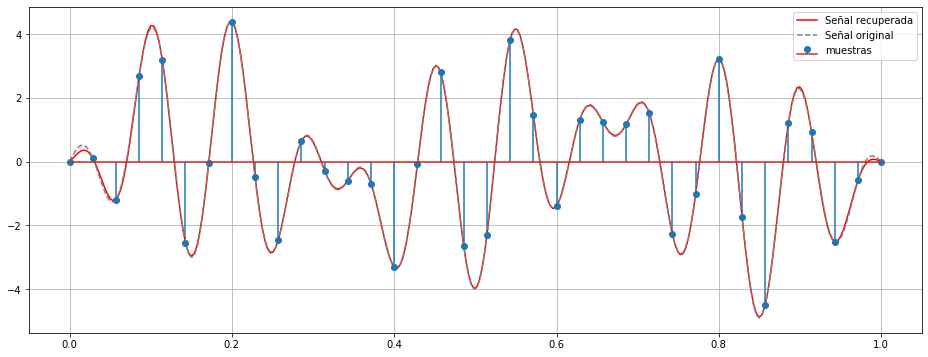

In [74]:
# Aplicamos la formula de interpolación
x_reconstruida = lambda t: sum([f(tk)*np.sinc(fs*(t- tk)) for tk in tn ])

plt.plot(t, x_reconstruida(t), color='r', label='Señal recuperada')
plt.plot(t, f(t), linestyle='--', color='gray', label = 'Señal original')
plt.stem(tn, f(tn), use_line_collection=True, label='muestras')
plt.legend()
plt.show()

### <ins>Problema 1</ins>

Implemente las siguientes funciones que permiten muestrear una función dada y reconstruirla usando la formula de interpolación de Whittaker-Shannon.

In [75]:
def muestreo(fs, t0, t1):
    """
    Obtienen los puntos en donde se debe muestrear la señal
    a una frecuencia fs (en Hz) en el intervalo t0 <= t < t1


    Params
    fs (float): frecuencia de muestreo.
    t0 (float): float, valor inicial de t.
    t1 (float): float, valor final de t.

    Returns
    numpy.ndarray: los puntos en el dominio en donde se debe muestrear la señal
    """
    pass

In [76]:
def interpolacion(x, tn, fs):
    """
    Aplica la formula de interpolacion de Shannon para generar x(t) a partir de las muestras xn


    Params:
    x (function): funcion a muestrear.
    tn (numpy.ndarray): ountos en donde se debe muestrear x(t)
    fs (float):  frecuencia de muestreo.

    Returns:
    function: funcion generada al aplicar la formula de interpolacion.
    """
    pass

In [77]:
def plot(x, x_interp, t0, t1):
    """
    Grafica las funciones x y x_interp en el intervalo t0 <= t <= t1

    Params:
    x (function): es una funcion cualquiera
    x_inter (function): es la funcion obtenida al muestrear x y aplicar la formula de interpolacion

    Returns:

    """
    pass

### <ins> Problema 2</ins>

Para cada una de las siguientes funciones identifique su ancho de banda y elija una frecuencia de muestreo adecuada.

1. $f(t) = \sin(12 \pi t - \frac{\pi}{2}) + \cos(2 \pi t)$

In [ ]:
## Seleccione una frecuencia de muestreo adecuada
fs = 

In [ ]:
# Muestreamos en el intervalo 0 <= t <= 12
t0, t1 = 0, 12
# definimos la funcion a muestrear
f1 = lambda t: np.sin(12*pi*t - np.pi/2)+ np.cos(2*pi*t)
# obtenemos los puntos en donde se debe muestrear la funcion
muestras = muestreo(fs, t0, t1)
# aplicamos la formula de Shannon
f1_int = interpolacion(f1, muestras, fs)
# Graficamos, identifique si existe aliasing o no
plot(x, f1_int, t0, t1)

2. $f(t) = \cos(3 \pi t)\sin^2(8 \pi t)$

In [ ]:
# Muestreamos en el intervalo -5 <= t <= 5
t0, t1 = -5, 5
# definimos la funcion a muestrear
f1 = lambda t: np.cos(3*np.pi*t)*np.sin(8*np.pi*t)**2
# obtenemos los puntos en donde se debe muestrear la funcion
muestras = muestreo(fs, t0, t1)
# aplicamos la formula de Shannon
f1_int = interpolacion(f1, muestras, fs)
# Graficamos, identifique si existe aliasing o no
plot(x, f1_int, t0, t1)

3. $f(t) = 2\operatorname{sinc}(20 \pi t) + 3\sin(10 \pi t ) - 0.5 \cos(2 \pi (t-  \frac{\pi}{3}))$

In [ ]:
## Seleccione una frecuencia de muestreo adecuada
fs = 

In [ ]:
# Muestreamos en el intervalo -12 <= t <= 12
t0, t1 = -12, 12
# definimos la funcion a muestrear
f1 = lambda t: 2*np.sinc(20*t) + 3*np.sin(10*np.pi*t) - 0.5*np.cos(2*np.pi*(t - np.pi/3))
# obtenemos los puntos en donde se debe muestrear la funcion
muestras = muestreo(fs, t0, t1)
# aplicamos la formula de Shannon
f1_int = interpolacion(f1, muestras, fs)
# Graficamos, identifique si existe aliasing o no
plot(x, f1_int, t0, t1)